<a href="https://colab.research.google.com/github/vis-hal-k/Internship_Data_science/blob/main/Random_ForesTClassi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [72]:
df = pd.read_csv("data/DataascsvRf.csv")
edf = pd.read_csv("data/DataascsvRf.csv")
df.head(10)
edf.head(2)

,User,Time,Coffee\n,Age,Images_Analyzed,Productivity
0,1,8,0,23,20,Good
1,1,13,0,23,14,Bad


### Above user is independent column so we drop it.

In [73]:
df.drop(['Images_Analyzed' , 'User'] , axis = 1 , inplace = True)
edf.drop(['Images_Analyzed' , 'User'] , axis = 1 , inplace = True)

In [75]:
df

,Time,Coffee\n,Age,Productivity
0,8,0,23,Good
1,13,0,23,Bad
2,17,0,23,Good
3,22,0,23,Bad
4,8,2,23,Good
...,...,...,...,...
75,23,4,52,Bad
76,9,6,52,Good
77,14,6,52,Bad
78,17,6,52,Bad


In [51]:
df.isna().sum()
#  so no Null Value 
df.dropna(inplace = True) # just for safe purpose and good practice

# Convert non-numeric data to numeric

In [52]:
df.shape

(80, 4)

### Way 1

In [53]:
get_dummy = pd.get_dummies(df.Productivity)
get_dummy  

,Bad,Good
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
75,1,0
76,0,1
77,1,0
78,1,0


In [54]:
merge_df = pd.concat([df , get_dummy] , axis = 1 )
merge_df.drop(['Productivity'] , axis = 1 , inplace = True)
display(merge_df)

,Time,Coffee\n,Age,Bad,Good
0,8,0,23,0,1
1,13,0,23,1,0
2,17,0,23,0,1
3,22,0,23,1,0
4,8,2,23,0,1
...,...,...,...,...,...
75,23,4,52,1,0
76,9,6,52,0,1
77,14,6,52,1,0
78,17,6,52,1,0


In [55]:
df

,Time,Coffee\n,Age,Productivity
0,8,0,23,Good
1,13,0,23,Bad
2,17,0,23,Good
3,22,0,23,Bad
4,8,2,23,Good
...,...,...,...,...
75,23,4,52,Bad
76,9,6,52,Good
77,14,6,52,Bad
78,17,6,52,Bad


### Way 2

In [76]:
edf.Productivity[edf.Productivity == "Good"] = 1
edf.Productivity[edf.Productivity == "Bad"] = 2

<ipython-input-76-68d5be97d692>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf.Productivity[edf.Productivity == "Good"] = 1
<ipython-input-76-68d5be97d692>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edf.Productivity[edf.Productivity == "Bad"] = 2


In [113]:
edf

,Time,Coffee\n,Age,Productivity
0,8,0,23,1
1,13,0,23,2
2,17,0,23,1
3,22,0,23,2
4,8,2,23,1
...,...,...,...,...
75,23,4,52,2
76,9,6,52,1
77,14,6,52,2
78,17,6,52,2


In [80]:
# Define dependent variable

In [114]:
y = edf['Productivity'].values
type(y[0])

int

In [115]:
y = y.astype('int')
type(y[0])

numpy.int64

In [91]:
type(merge_df.Bad.values[0])

numpy.uint8

In [116]:
x = edf.drop(labels = ['Productivity'] , axis =1 )
display(x)
display(y)

,Time,Coffee\n,Age
0,8,0,23
1,13,0,23
2,17,0,23
3,22,0,23
4,8,2,23
...,...,...,...
75,23,4,52
76,9,6,52
77,14,6,52
78,17,6,52


array([1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2])

In [119]:

Y= pd.DataFrame(y)
Y

,0
0,1
1,2
2,1
3,2
4,1
...,...
75,2
76,1
77,2
78,2


# Split the data into Train and Test

In [120]:
from sklearn.model_selection import train_test_split  as tts  
x_train , x_test , y_train , y_test = tts(x,Y,test_size = 0.4 , random_state = 20  )

In [121]:
x_train.shape
type(y_train)

pandas.core.frame.DataFrame

Now we are ready for train and test the data in **Random Forest Model**

In [122]:
from sklearn.ensemble import RandomForestClassifier 
Rfc_model = RandomForestClassifier(random_state = 30 )
Rfc_model.fit(x_train , y_train)

<ipython-input-122-a3d7449b05a4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rfc_model.fit(x_train , y_train)


RandomForestClassifier(random_state=30)

In [135]:
#  pridection 
pred_y_val_resofX =  Rfc_model.predict(x_test)
display(pred_y_val_resofX)
display(y_test.T)

array([1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 1])

,23,38,45,44,33,39,0,55,42,5,...,74,76,77,35,52,53,51,72,1,36
0,2,1,2,1,2,2,1,2,1,2,...,1,1,2,2,1,2,2,1,2,1


In [125]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred_y_val_resofX)
cm

array([[14,  1],
       [ 3, 14]])

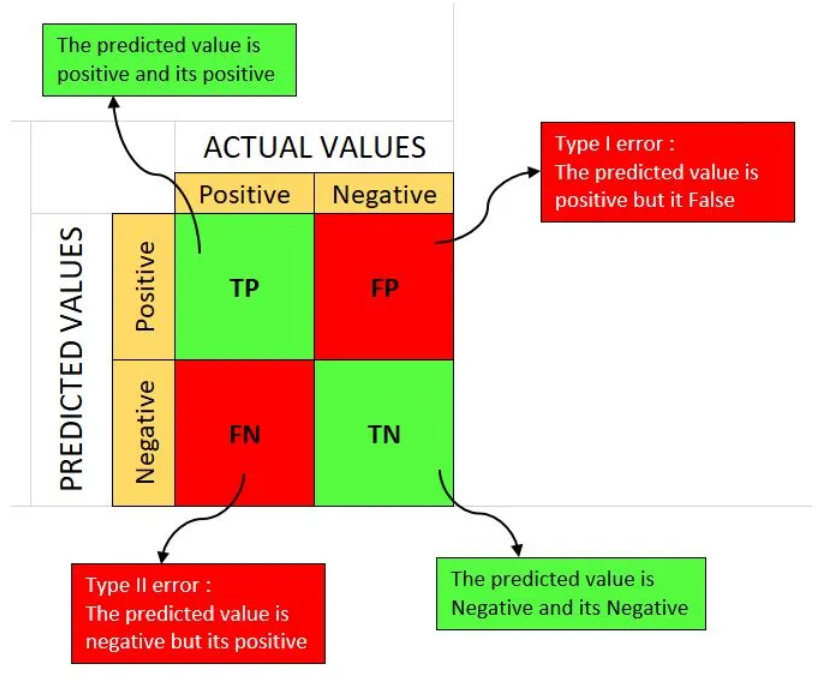

In [142]:
from sklearn import metrics
print("Accuracy = " , metrics.accuracy_score(y_test , pred_y_val_resofX)*100)
print("Score (test) = " ,Rfc_model.score(x_test, y_test)*100)
print("Score(train)",Rfc_model.score(x_train, y_train)*100)

Accuracy =  87.5
Score (test) =  87.5
Score(train) 100.0


### Here we check how much importance of features in model Or also call Co-relation 

In [156]:
feature_list = list(x.columns)
print("    Feature list  = ",feature_list)
print("Feature_imp_Value = " , Rfc_model.feature_importances_  )
print("---------Another way or presentable-----------")
feature_imp=  pd.Series(Rfc_model.feature_importances_,index = feature_list).sort_values(ascending=False)
print(feature_imp)

    Feature list  =  ['Time', 'Coffee\n', 'Age']
Feature_imp_Value =  [0.58777048 0.27720542 0.1350241 ]
---------Another way or presentable-----------
Time        0.587770
Coffee\n    0.277205
Age         0.135024
dtype: float64
